### Logistic Regression
Used for
- Classification Analysis
- Predective Analysis

Estimates the probability of an event occurring, such as voted or didn't vote.

The outcome is a probability, the dependent variable is bounded between 0 and 1.

Example:
Using the Titanic data set combined with a Python logistic regression model to predict whether or not a passenger survived the Titanic crash.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = 'https://gist.githubusercontent.com/jiisanda/642bd8c6e6144b099e6d0ed9cf3490a4/raw/bbbcfc4a85eb653968de14e22ab7a9081fa097b8/titanic.csv'
titanic_data = pd.read_csv(url)
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<Axes: xlabel='Survived', ylabel='count'>

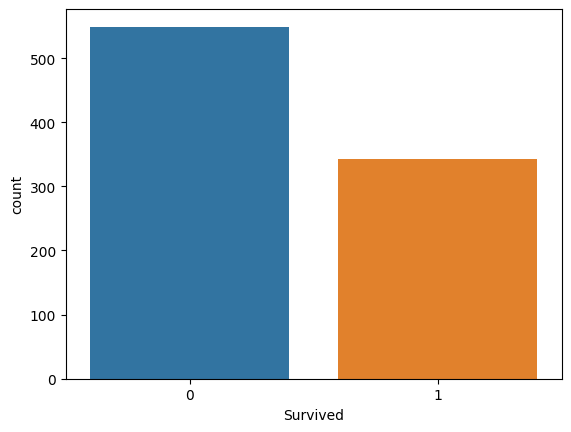

In [5]:
# Learning About Our Data Set With Exploratory Data Analysis
# The Prevalence of Each Classification Category
sns.countplot(x='Survived', data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

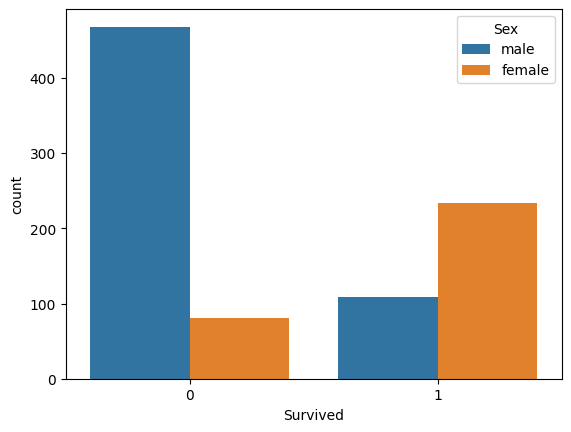

In [6]:
# Survival Rates Between Genders
sns.countplot(x='Survived', hue='Sex', data=titanic_data)

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

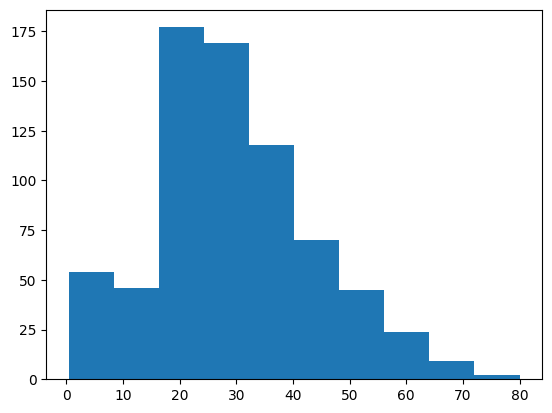

In [7]:
# The Age Distribution of Titanic Passengers
plt.hist(titanic_data['Age'].dropna())

In [9]:
# Removing Null Data From Our Data Set
# DataFrame of boolean values where the cell contains True if it is a null value and False otherwise
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

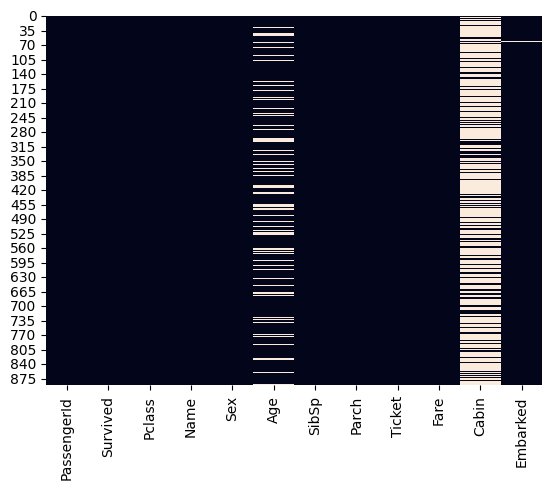

In [10]:
# the white lines indicate missing values in the dataset
sns.heatmap(titanic_data.isnull(), cbar=False)

The Age column in particular contains a small enough amount of missing that that we can fill in the missing data using some form of mathematics. On the other hand, the Cabin data is missing enough data that we could probably remove it from our model entirely.

The process of filling in missing data with average data from the rest of the data set is called imputation.

We will fill in the missing Age values with the average Age value

<Axes: >

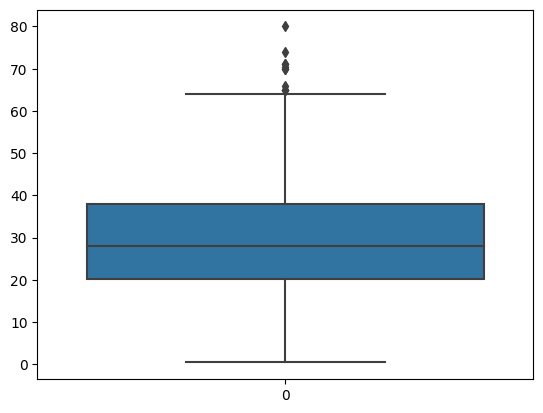

In [16]:
sns.boxplot(titanic_data['Age'])

In [17]:
#Pclass value 1

titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()

#Pclass value 2

titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

#Pclass 3

titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()

29.87763005780347

In [18]:
def impute_missing_age(columns):
    age = columns[0]
    passenger_class = columns[1]
    if pd.isnull(age):
        if(passenger_class == 1):
            return titanic_data[titanic_data['Pclass'] == 1]['Age'].mean()
        elif(passenger_class == 2):
            return titanic_data[titanic_data['Pclass'] == 2]['Age'].mean()
        elif(passenger_class == 3):
            return titanic_data[titanic_data['Pclass'] == 3]['Age'].mean()
    else:
        return age

In [19]:
titanic_data['Age'] = titanic_data[['Age', 'Pclass']].apply(impute_missing_age, axis = 1)


<Axes: >

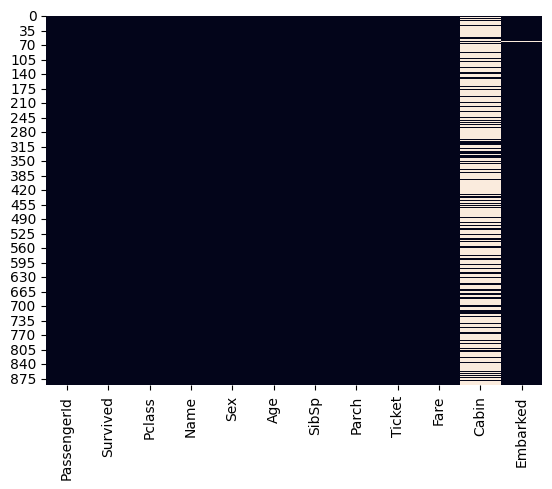

In [20]:
sns.heatmap(titanic_data.isnull(), cbar=False)


### Building a Logistic Regression Model


In [21]:
# Removing Columns With Too Much Missing Data
titanic_data.drop('Cabin', axis=1, inplace = True)


In [22]:
titanic_data.dropna(inplace = True)


In [24]:
# Handling Categorical Data With Dummy Variables
pd.get_dummies(titanic_data['Sex'])


,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [25]:
pd.get_dummies(titanic_data['Sex'], drop_first = True)


,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [26]:
sex_data = pd.get_dummies(titanic_data['Sex'], drop_first = True)

embarked_data = pd.get_dummies(titanic_data['Embarked'], drop_first = True)

In [27]:
# Adding Dummy Variables to the pandas DataFrame
titanic_data = pd.concat([titanic_data, sex_data, embarked_data], axis = 1)


In [28]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'male', 'Q', 'S'],
      dtype='object')

In [29]:
# Removing Unnecessary Columns From The Data Set
titanic_data.drop(['Name', 'Ticket', 'Sex', 'Embarked'], axis = 1, inplace = True)


In [30]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'male', 'Q', 'S'],
      dtype='object')

In [31]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [32]:
# Creating Training Data and Test Data
y_data = titanic_data['Survived']

x_data = titanic_data.drop('Survived', axis = 1)

In [33]:
from sklearn.model_selection import train_test_split
x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(x_data, y_data, test_size = 0.3)


In [34]:
# Training the Logistic Regression Model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_training_data, y_training_data)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
# Making Predictions With Our Logistic Regression Model
predictions = model.predict(x_test_data)


In [36]:
# Measuring the Performance of a Logistic Regression Machine Learning Model
from sklearn.metrics import classification_report
classification_report(y_test_data, predictions)

'              precision    recall  f1-score   support\n\n           0       0.79      0.89      0.84       161\n           1       0.79      0.65      0.72       106\n\n    accuracy                           0.79       267\n   macro avg       0.79      0.77      0.78       267\nweighted avg       0.79      0.79      0.79       267\n'

<Axes: >

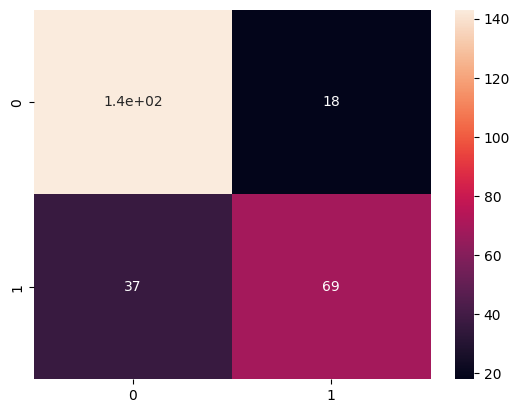

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test_data, predictions)
sns.heatmap(cm, annot=True)

```

Logistic Regression  | Linear Regression
-------------------|------------------
to explain internet use among older adults  |  evaluation of teacher's information quality
to access household financial decisions regarding debt       | Row 2, Col 2

---

### Application of Logistic Regression
1) To explain internet use among older adults
